# Load data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid", palette="bright")

import os

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from google.colab import files
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install -U ppscore --no-deps # Update ppscore without updating its dependencies


  Using cached ppscore-1.3.0.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=9809268e811dc0017cc93db4be2c207e8f755a0be2e617b78a91853b8ac23cd2
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as pps # Import ppscore

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/df_eda.csv'
df = pd.read_csv(path, sep=',')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_encoded,RainTomorrow_encoded
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141006 entries, 0 to 141005
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  141006 non-null  object 
 1   Location              141006 non-null  object 
 2   MinTemp               140731 non-null  float64
 3   MaxTemp               140816 non-null  float64
 4   Rainfall              139845 non-null  float64
 5   Evaporation           81313 non-null   float64
 6   Sunshine              74351 non-null   float64
 7   WindGustDir           132680 non-null  object 
 8   WindGustSpeed         132738 non-null  float64
 9   WindDir9am            132066 non-null  object 
 10  WindDir3pm            138181 non-null  object 
 11  WindSpeed9am          140416 non-null  float64
 12  WindSpeed3pm          139318 non-null  float64
 13  Humidity9am           139717 non-null  float64
 14  Humidity3pm           138061 non-null  float64
 15  

In [ ]:
df.shape

(141006, 25)

# Feature engineering

### Other Feature engineering candidates:
*   remove unimportant features
*   impute missed data ( Evaporation, Sunshine, Cloud9am, and Cloud3pm ), apply appropriate imputation methods
*   temperature - calculate deltas of + pers of change ( frost or heatwaves )
*   humidity variability, + pers
*   Lagged features -  yesterday's humidity, temperature
*   Rolling averages for the last week/3 days - for Temperature, Pressure, Humidity Averages. Could help to highlight longer-term trends.


## Location

In [ ]:
cities = df['Location'].unique()
print(cities)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Sicne there are a lot of Cities, I decided to find out some other grouping opportunities by location name:

In [ ]:
path2 = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/cities_meta.csv'
cities_meta = pd.read_csv(path2)
cities_meta.set_index('City Name', inplace=True)
cities_meta.head()

,Administrative Region,Geographic Region,Climatic zone,Elevation Zone,Latitude,Longitude
City Name,,,,,,
Albury,New South Wales,Southeastern Australia,Temperate,Lowland,36.0740,146.9240
BadgerysCreek,New South Wales,Eastern Australia,Temperate,Lowland,33.8785,150.7605
Cobar,New South Wales,Eastern Australia,Semi-arid,Lowland,31.4980,145.8340
CoffsHarbour,New South Wales,Eastern Australia,Subtropical,Coastal,30.2986,153.1094
Moree,New South Wales,Eastern Australia,Semi-arid,Plain,29.4658,149.8418


In [ ]:
print('Clim zones:', cities_meta['Climatic zone'].unique())

Clim zones: ['Temperate' 'Semi-arid' 'Subtropical' 'Tropical' 'Mediterranean' 'Desert']


In [ ]:
df['ClimaticZone'] = df['Location'].map(cities_meta['Climatic zone'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141006 entries, 0 to 141005
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  141006 non-null  object 
 1   Location              141006 non-null  object 
 2   MinTemp               140731 non-null  float64
 3   MaxTemp               140816 non-null  float64
 4   Rainfall              139845 non-null  float64
 5   Evaporation           81313 non-null   float64
 6   Sunshine              74351 non-null   float64
 7   WindGustDir           132680 non-null  object 
 8   WindGustSpeed         132738 non-null  float64
 9   WindDir9am            132066 non-null  object 
 10  WindDir3pm            138181 non-null  object 
 11  WindSpeed9am          140416 non-null  float64
 12  WindSpeed3pm          139318 non-null  float64
 13  Humidity9am           139717 non-null  float64
 14  Humidity3pm           138061 non-null  float64
 15  

<ipython-input-18-880d3ff433b1>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df, x='ClimaticZone', hue='RainTomorrow', color='skyblue')


<Axes: xlabel='ClimaticZone', ylabel='count'>

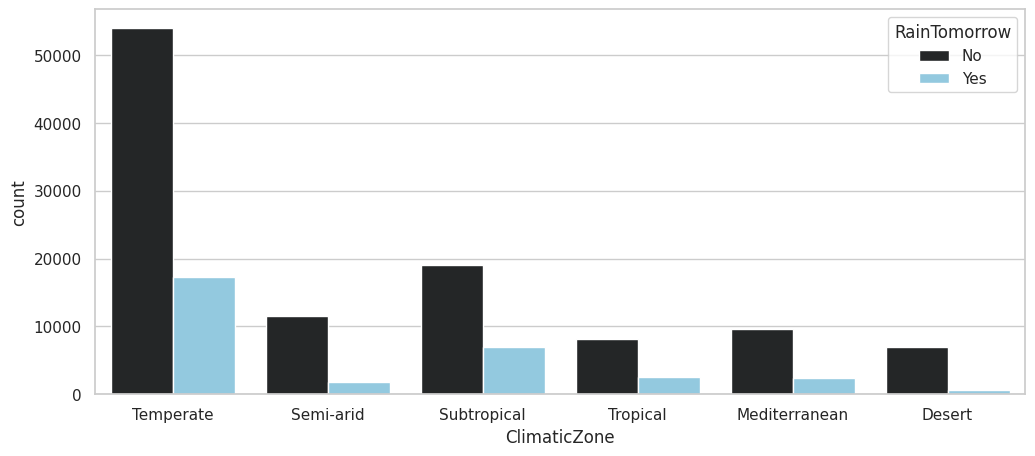

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='ClimaticZone', hue='RainTomorrow', color='skyblue')

## Months and Seasons

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_encoded,RainTomorrow_encoded,ClimaticZone,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0,0.0,Temperate,December
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0,0.0,Temperate,December
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0,0.0,Temperate,December
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0,0.0,Temperate,December
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0,0.0,Temperate,December


<ipython-input-22-8f6c609e00ea>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=df, x='Month', hue='RainTomorrow', color='orange')


<Axes: xlabel='Month', ylabel='count'>

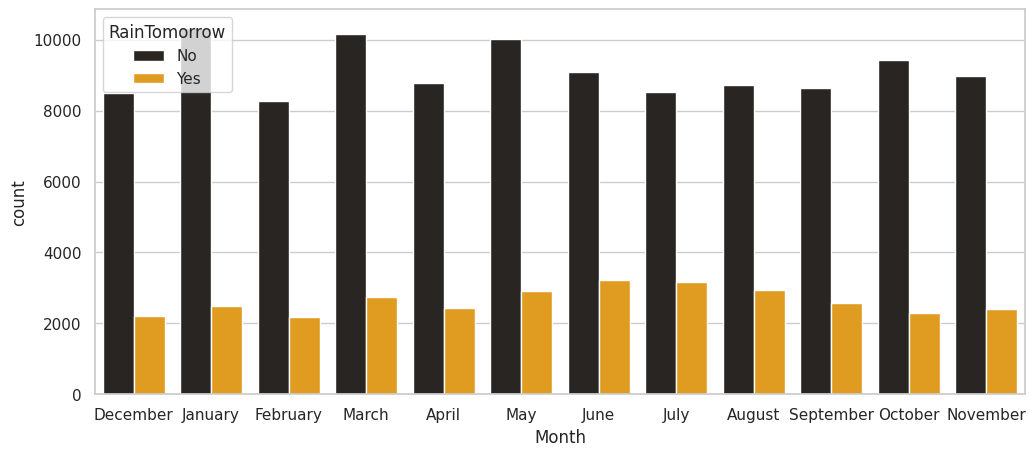

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Month', hue='RainTomorrow', color='orange')

<Axes: xlabel='Month'>

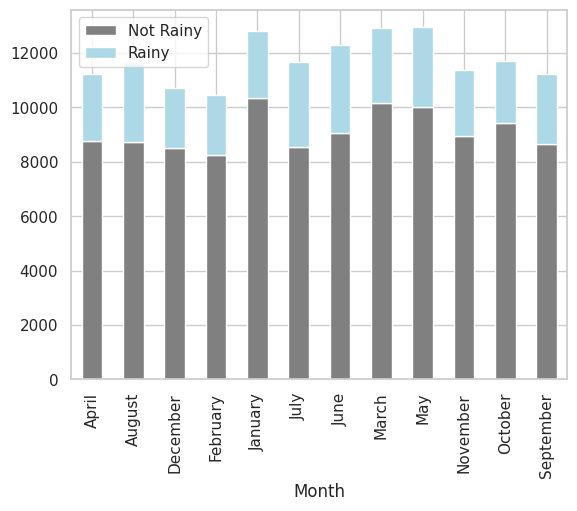

In [ ]:
monthly_rain = df.groupby('Month')['RainTomorrow_encoded'].value_counts()
monthly_rain  = monthly_rain.unstack(fill_value=0)
# monthly_rain
monthly_rain.columns = ['Not Rainy', 'Rainy']
monthly_rain.plot(kind='bar', stacked=True, color=['gray', 'lightblue'])


In [ ]:
monthly_rain

,Not Rainy,Rainy
Month,,
April,8842,2462
August,8792,2970
December,8559,2250
February,8317,2207
January,10418,2498
July,8608,3171
June,9143,3244
March,10248,2779
May,10108,2941


## Mapping wind directions

In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [ ]:
wind_mapping = {
    'N': 'North', 'NNE': 'North', 'NE': 'North', 'NNW': 'North',
    'S': 'South', 'SSE': 'South', 'SE': 'South', 'SSW': 'South',
    'E': 'East', 'ENE': 'East', 'ESE': 'East',
    'W': 'West', 'WNW': 'West', 'WSW': 'West', 'NW': 'West', 'SW': 'West'
}

In [ ]:
df['WindGustDir'] = df['WindGustDir'].map(wind_mapping)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_mapping)
df['WindDir9am'] = df['WindDir9am'].map(wind_mapping)

In [ ]:
# set's true if the wind direction changed between WindDir3pm and WindDir9am during the day
df['WindDirChange'] = df['WindDir3pm'] != df['WindDir9am']

<ipython-input-119-311411b61a5b>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=df, x='RainTomorrow_encoded', hue='WindDirChange', color='orange')


<Axes: xlabel='RainTomorrow_encoded', ylabel='count'>

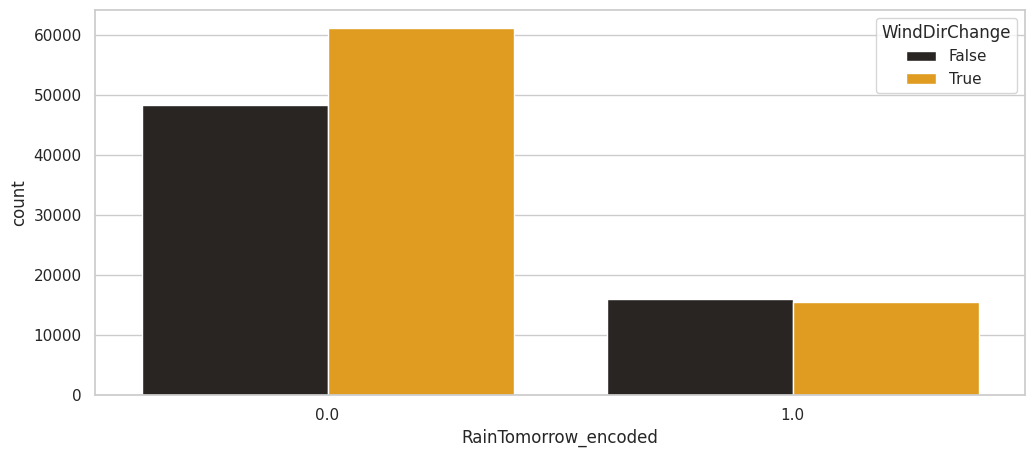

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='RainTomorrow_encoded', hue='WindDirChange', color='orange')

In [ ]:
df.head().T

,0,1,2,3,4
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,West,West,West,North,West
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,West,North,West,South,East


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141006 entries, 0 to 141005
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  141006 non-null  datetime64[ns]
 1   Location              141006 non-null  object        
 2   MinTemp               140731 non-null  float64       
 3   MaxTemp               140816 non-null  float64       
 4   Rainfall              139845 non-null  float64       
 5   Evaporation           81313 non-null   float64       
 6   Sunshine              74351 non-null   float64       
 7   WindGustDir           132680 non-null  object        
 8   WindGustSpeed         132738 non-null  float64       
 9   WindDir9am            132066 non-null  object        
 10  WindDir3pm            138181 non-null  object        
 11  WindSpeed9am          140416 non-null  float64       
 12  WindSpeed3pm          139318 non-null  float64       
 13 

In [ ]:
df['Humidity_delta'] = df['Humidity3pm'] - df['Humidity9am']
df['Temp_delta'] = df['Temp3pm'] - df['Temp9am']
df['Wind_delta'] = df['WindSpeed3pm'] - df['WindSpeed9am']
df['Pressure_delta'] = df['Pressure3pm'] - df['Pressure9am']

In [ ]:
df['7DayAvgHumidity'] = df['Humidity3pm'].rolling(window=7).mean()
df['7DayAvgTemp'] = df['Temp3pm'].rolling(window=7).mean()
df['7DayAvgWindSpeed'] = df['WindGustSpeed'].rolling(window=7).mean()
df['7DayAvgPressure9am'] = df['Pressure9am'].rolling(window=7).mean()
df['7DayAvgCloud3pm'] = df['Cloud3pm'].rolling(window=7).mean()
df['7DayAvgRainfall'] = df['Rainfall'].rolling(window=7).mean()
df['7DayAvgSunshine'] = df['Sunshine'].rolling(window=7).mean()

df['3DayAvgHumidity'] = df['Humidity3pm'].rolling(window=3).mean()
df['3DayAvgTemp'] = df['Temp3pm'].rolling(window=3).mean()
df['3DayAvgWindSpeed'] = df['WindGustSpeed'].rolling(window=3).mean()
df['3DayAvgPressure9am'] = df['Pressure9am'].rolling(window=3).mean()
df['3DayAvgCloud3pm'] = df['Cloud3pm'].rolling(window=3).mean()
df['3DayAvgRainfall'] = df['Rainfall'].rolling(window=3).mean()
df['3DayAvgSunshine'] = df['Sunshine'].rolling(window=3).mean()


In [ ]:
df.head().T

,0,1,2,3,4
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,West,West,West,North,West
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,West,North,West,South,East


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141006 entries, 0 to 141005
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  141006 non-null  datetime64[ns]
 1   Location              141006 non-null  object        
 2   MinTemp               140731 non-null  float64       
 3   MaxTemp               140816 non-null  float64       
 4   Rainfall              139845 non-null  float64       
 5   Evaporation           81313 non-null   float64       
 6   Sunshine              74351 non-null   float64       
 7   WindGustDir           132680 non-null  object        
 8   WindGustSpeed         132738 non-null  float64       
 9   WindDir9am            132066 non-null  object        
 10  WindDir3pm            138181 non-null  object        
 11  WindSpeed9am          140416 non-null  float64       
 12  WindSpeed3pm          139318 non-null  float64       
 13 

<ipython-input-42-7868aaf8f481>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=0.5, annot=True, cmap="coolwarm")


<Axes: >

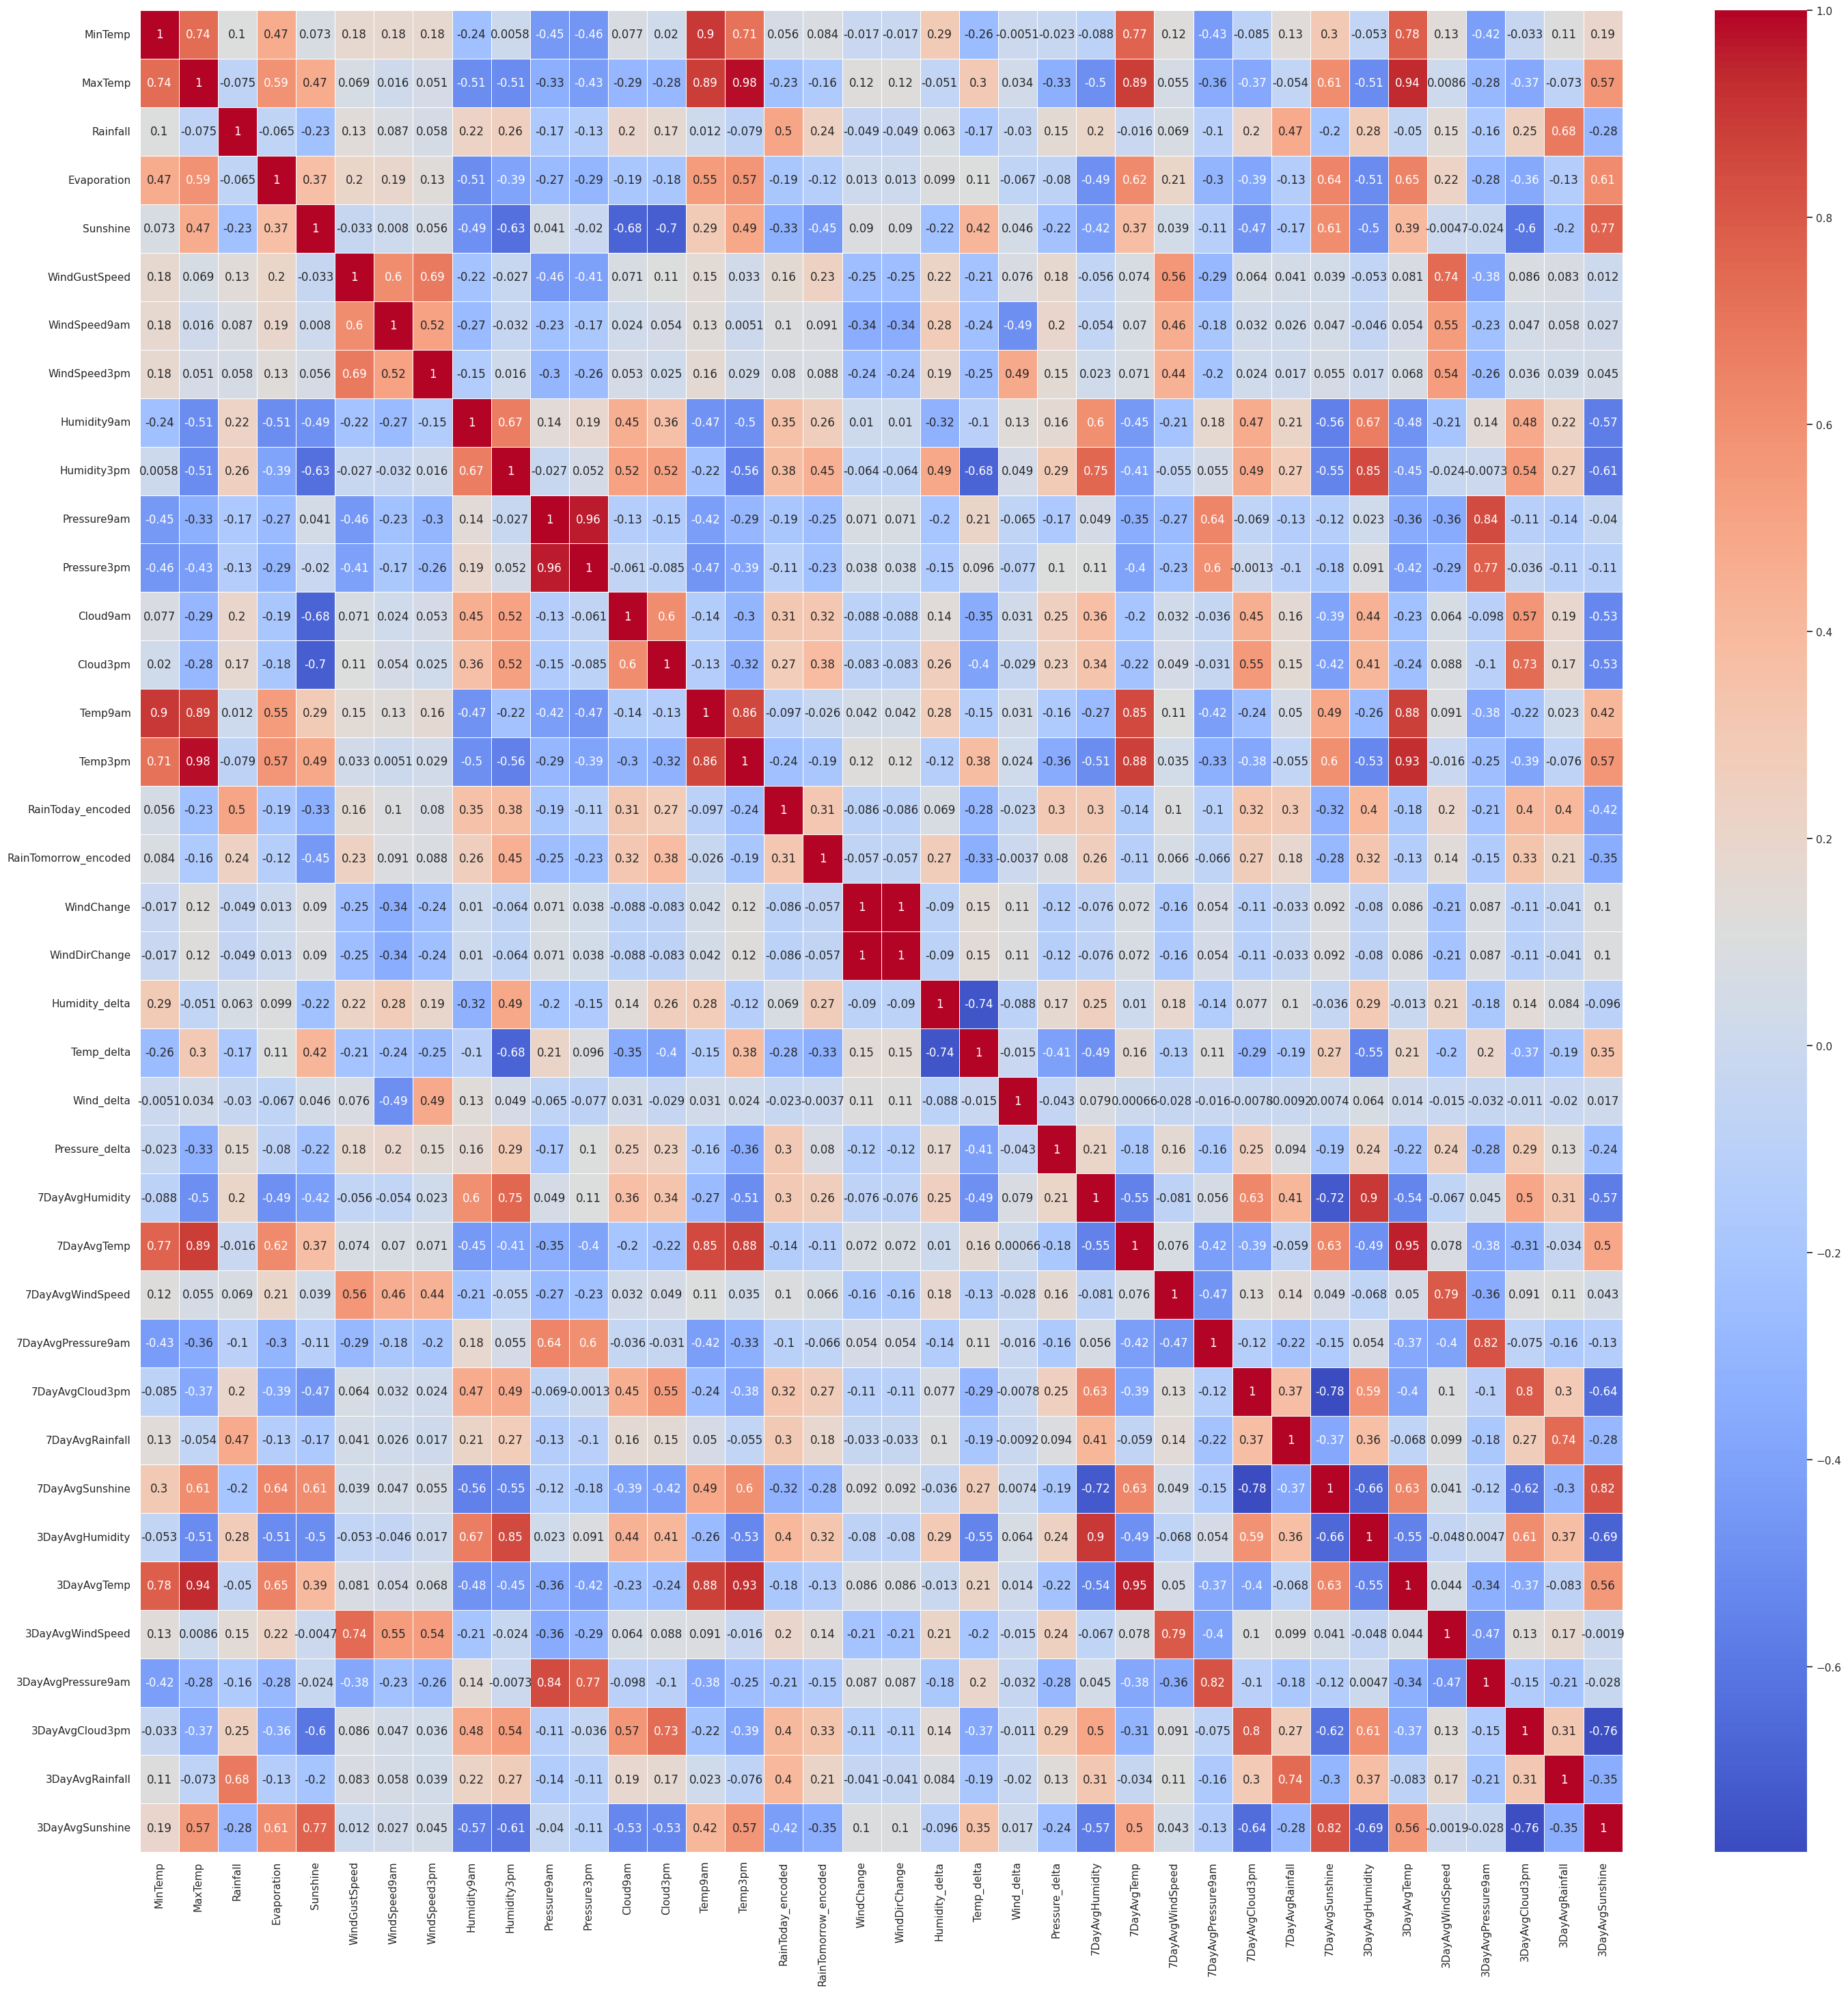

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), linewidths=0.5, annot=True, cmap="coolwarm")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

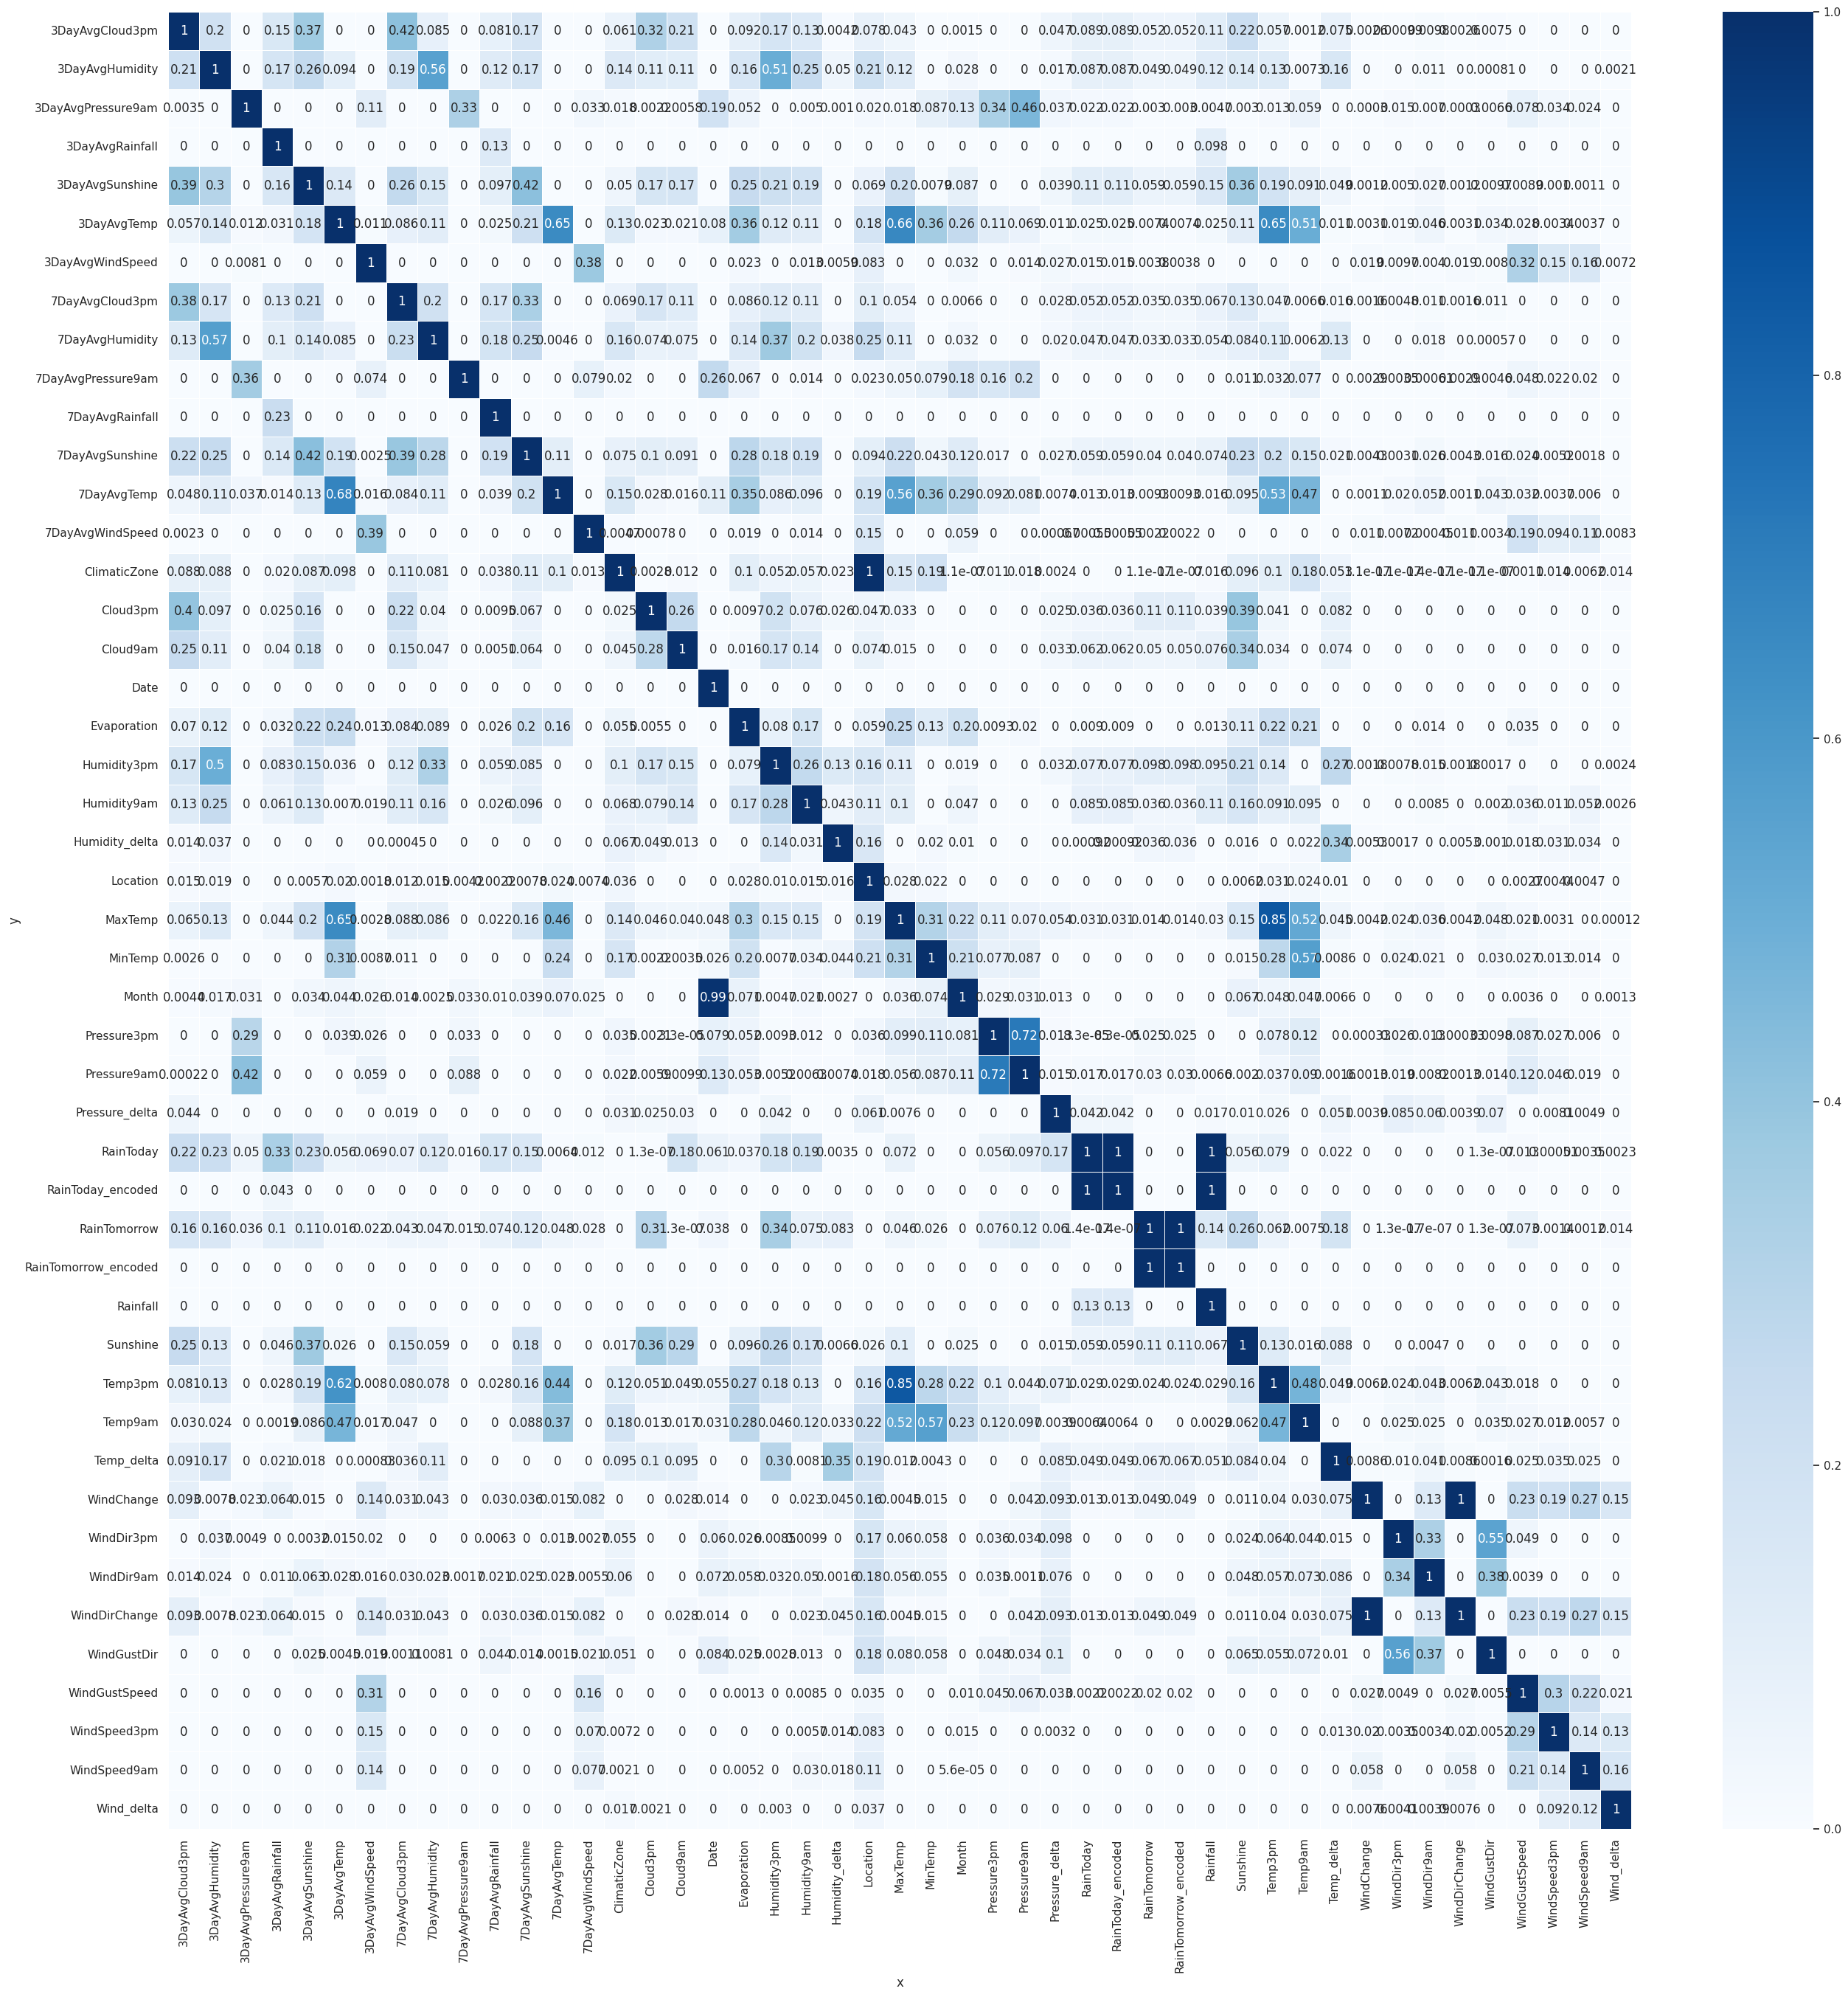

In [ ]:
mat = pps.matrix(df)
plt.figure(figsize=(32, 32))
sns.heatmap(mat.pivot(columns='x', index='y', values='ppscore'),
            vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [ ]:
# Filter the matrix to show only the PPS scores for 'RainTomorrow' as target
matrix_raintom_filtered = mat[mat['y'] == 'RainTomorrow']
table = pd.DataFrame(matrix_raintom_filtered)
sorted_table = table[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False)
sorted_table['pers'] = round(sorted_table['ppscore']*100, 2)
print(sorted_table)

                         x             y       ppscore    pers
1056          RainTomorrow  RainTomorrow  1.000000e+00  100.00
1150  RainTomorrow_encoded  RainTomorrow  1.000000e+00  100.00
680            Humidity3pm  RainTomorrow  3.445369e-01   34.45
868               Cloud3pm  RainTomorrow  2.950618e-01   29.51
304               Sunshine  RainTomorrow  2.561609e-01   25.62
1432            Temp_delta  RainTomorrow  1.804857e-01   18.05
2090       3DayAvgCloud3pm  RainTomorrow  1.617098e-01   16.17
1902       3DayAvgHumidity  RainTomorrow  1.558536e-01   15.59
210               Rainfall  RainTomorrow  1.435209e-01   14.35
727            Pressure9am  RainTomorrow  1.204567e-01   12.05
1855       7DayAvgSunshine  RainTomorrow  1.166754e-01   11.67
2184       3DayAvgSunshine  RainTomorrow  1.057099e-01   10.57
2137       3DayAvgRainfall  RainTomorrow  1.008300e-01   10.08
1385        Humidity_delta  RainTomorrow  8.324395e-02    8.32
774            Pressure3pm  RainTomorrow  7.579485e-02 

In [ ]:
df = df.drop(['Date', '3DayAvgPressure9am', '7DayAvgWindSpeed', 'MinTemp', '3DayAvgWindSpeed', '3DayAvgTemp',
              '7DayAvgPressure9am', 'Wind_delta', 'Temp9am', 'WindSpeed3pm', 'WindSpeed9am', 'WindDir9am',
              'RainToday', 'WindDir3pm', 'WindGustDir', 'Cloud9am', 'Month', 'Location', 'WindDirChange', 'Evaporation', 'ClimaticZone'], axis=1)

In [ ]:
df.head().T

,0,1,2,3,4
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
Humidity9am,71.0,44.0,38.0,45.0,82.0
Humidity3pm,22.0,25.0,30.0,16.0,33.0
Pressure9am,1007.7,1010.6,1007.6,1017.6,1010.8
Pressure3pm,1007.1,1007.8,1008.7,1012.8,1006.0
Cloud3pm,NaN,NaN,2.0,NaN,8.0
Temp3pm,21.8,24.3,23.2,26.5,29.7


# Test-train split

In [ ]:
df.shape

(141006, 25)

In [ ]:
df_train = df.iloc[:112804]
df_test = df.iloc[112804:]

In [ ]:
df_train.shape

(112804, 25)

In [ ]:
df_train = df_train.drop('RainTomorrow', axis=1)
df_test = df_test.drop('RainTomorrow', axis=1)

# Imputation

## Numerical Variables:
- MinTemp: mean
- MaxTemp: median

- Temp9am, Temp3pm: median

- Rainfall, Evaporation: median imputation due to skeweness distributions, outliers and little missed values.

- **Sunshine**: could be median, or more sophisticated method ( like regression imputation or KNN ) since there's a clear relationship with target variable. Zero imputation might also be vorking.

- WindGustSpeed, WindSpeed9am, WindSpeed3pm: median

- Humidity9am, Humidity3pm: median

- Pressure9am, Pressure3pm: mean

- Cloud9am: median
- **Cloud3pm**: KNN / Regression imputation

## Categorical Variables:
- WindGustDir, WindDir9am, WindDir3pm: mode
- RainToday: mode

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MaxTemp,112652.0,22.735112,6.872931,-4.800000,17.700000,22.300000,27.500000,48.100000
Rainfall,111746.0,2.397209,8.573518,0.000000,0.000000,0.000000,0.800000,371.000000
Sunshine,58513.0,7.413209,3.818887,0.000000,4.500000,8.200000,10.500000,14.500000
WindGustSpeed,104822.0,39.870676,13.836970,7.000000,30.000000,39.000000,48.000000,135.000000
Humidity9am,111642.0,70.312741,18.249127,0.000000,59.000000,71.000000,84.000000,100.000000
Humidity3pm,110744.0,52.768060,20.508526,0.000000,38.000000,53.000000,67.000000,100.000000
Pressure9am,103990.0,1018.047751,7.013797,980.500000,1013.400000,1018.000000,1022.700000,1041.000000
Pressure3pm,103979.0,1015.727552,6.911220,979.000000,1011.100000,1015.700000,1020.400000,1038.200000
Cloud3pm,68596.0,4.639571,2.696048,0.000000,2.000000,5.000000,7.000000,9.000000
Temp3pm,111459.0,21.250771,6.698387,-5.400000,16.400000,20.800000,25.800000,46.700000


## Imputing Sunshine and Cloud3pm using KNN

In [ ]:
df_train[['Sunshine', 'Cloud3pm']].describe()

,Sunshine,Cloud3pm
count,58513.000000,68596.000000
mean,7.413209,4.639571
std,3.818887,2.696048
min,0.000000,0.000000
25%,4.500000,2.000000
50%,8.200000,5.000000
75%,10.500000,7.000000
max,14.500000,9.000000


## Imputing Cloud3pm

In [ ]:
df_train['Humidity9am'].fillna(df_train['Humidity9am'].median(), inplace=True)
df_train['Humidity3pm'].fillna(df_train['Humidity3pm'].median(), inplace=True)
df_train['Temp3pm'].fillna(df_train['Temp3pm'].median(), inplace=True)
df_train['MaxTemp'].fillna(df_train['MaxTemp'].median(), inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112804 entries, 0 to 112803
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MaxTemp               112804 non-null  float64
 1   Rainfall              111746 non-null  float64
 2   Sunshine              58513 non-null   float64
 3   WindGustSpeed         104822 non-null  float64
 4   Humidity9am           112804 non-null  float64
 5   Humidity3pm           112804 non-null  float64
 6   Pressure9am           103990 non-null  float64
 7   Pressure3pm           103979 non-null  float64
 8   Cloud3pm              68596 non-null   float64
 9   Temp3pm               112804 non-null  float64
 10  RainToday_encoded     111746 non-null  float64
 11  RainTomorrow_encoded  112804 non-null  float64
 12  Humidity_delta        110326 non-null  float64
 13  Temp_delta            111155 non-null  float64
 14  Pressure_delta        103821 non-null  float64
 15  

In [ ]:
features_for_imputation = ['Cloud3pm', 'MaxTemp', 'Humidity3pm', 'Humidity9am', 'Temp3pm']
df_for_imputation = df_train[features_for_imputation].copy()
df_for_imputation.head()

,Cloud3pm,MaxTemp,Humidity3pm,Humidity9am,Temp3pm
0,NaN,22.9,22.0,71.0,21.8
1,NaN,25.1,25.0,44.0,24.3
2,2.0,25.7,30.0,38.0,23.2
3,NaN,28.0,16.0,45.0,26.5
4,8.0,32.3,33.0,82.0,29.7


In [ ]:
# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=features_for_imputation, index=df_for_imputation.index)

In [ ]:
df_train['Cloud3pm'] = df_imputed['Cloud3pm']

In [ ]:
df_train.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainTomorrow,RainToday_encoded,RainTomorrow_encoded,Humidity_delta,Temp_delta,Pressure_delta,7DayAvgHumidity,7DayAvgTemp,7DayAvgCloud3pm,7DayAvgRainfall,7DayAvgSunshine,3DayAvgHumidity,3DayAvgCloud3pm,3DayAvgRainfall,3DayAvgSunshine
0,22.9,0.6,NaN,44.0,71.0,22.0,1007.7,1007.1,2.6,21.8,No,0.0,0.0,-49.0,4.9,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.1,0.0,NaN,44.0,44.0,25.0,1010.6,1007.8,1.2,24.3,No,0.0,0.0,-19.0,7.1,-2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.7,0.0,NaN,46.0,38.0,30.0,1007.6,1008.7,2.0,23.2,No,0.0,0.0,-8.0,2.2,1.1,NaN,NaN,NaN,NaN,NaN,25.666667,NaN,0.200000,NaN
3,28.0,0.0,NaN,24.0,45.0,16.0,1017.6,1012.8,2.8,26.5,No,0.0,0.0,-29.0,8.4,-4.8,NaN,NaN,NaN,NaN,NaN,23.666667,NaN,0.000000,NaN
4,32.3,1.0,NaN,41.0,82.0,33.0,1010.8,1006.0,8.0,29.7,No,0.0,0.0,-49.0,11.9,-4.8,NaN,NaN,NaN,NaN,NaN,26.333333,NaN,0.333333,NaN


## Imputing Sunshine

In [ ]:
# Select the features to use for imputation (NO2 and its correlated features)
features_for_imputation = ['Sunshine', 'Cloud3pm', 'Humidity3pm', 'Humidity9am', 'Temp3pm', 'MaxTemp']
df_for_imputation = df_train[features_for_imputation].copy()
df_for_imputation.head()

,Sunshine,Cloud3pm,Humidity3pm,Humidity9am,Temp3pm,MaxTemp
0,NaN,2.6,22.0,71.0,21.8,22.9
1,NaN,1.2,25.0,44.0,24.3,25.1
2,NaN,2.0,30.0,38.0,23.2,25.7
3,NaN,2.8,16.0,45.0,26.5,28.0
4,NaN,8.0,33.0,82.0,29.7,32.3


In [ ]:
df_for_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112804 entries, 0 to 112803
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Sunshine     58513 non-null   float64
 1   Cloud3pm     112804 non-null  float64
 2   Humidity3pm  112804 non-null  float64
 3   Humidity9am  112804 non-null  float64
 4   Temp3pm      112804 non-null  float64
 5   MaxTemp      112804 non-null  float64
dtypes: float64(6)
memory usage: 5.2 MB


In [ ]:
df_train.tail()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainTomorrow,RainToday_encoded,RainTomorrow_encoded,Humidity_delta,Temp_delta,Pressure_delta,7DayAvgHumidity,7DayAvgTemp,7DayAvgCloud3pm,7DayAvgRainfall,7DayAvgSunshine,3DayAvgHumidity,3DayAvgCloud3pm,3DayAvgRainfall,3DayAvgSunshine
112799,23.6,0.0,9.8,26.0,69.0,32.0,1030.7,1026.9,1.0,22.8,No,0.0,0.0,-37.0,7.4,-3.8,41.285714,21.042857,NaN,0.485714,9.128571,38.333333,2.333333,0.0,9.800000
112800,24.2,0.0,9.7,31.0,73.0,33.0,1028.0,1024.8,2.4,22.6,No,0.0,0.0,-40.0,9.4,-3.2,41.142857,21.114286,NaN,0.485714,9.142857,33.666667,NaN,0.0,9.766667
112801,23.4,0.0,7.7,28.0,85.0,43.0,1028.5,1025.8,2.4,22.1,No,0.0,0.0,-42.0,8.3,-2.7,41.714286,21.200000,NaN,0.485714,9.100000,36.000000,NaN,0.0,9.066667
112802,24.1,0.0,9.5,37.0,66.0,41.0,1028.9,1025.8,3.0,23.4,No,0.0,0.0,-25.0,6.7,-3.1,41.000000,21.214286,NaN,0.485714,9.171429,39.000000,NaN,0.0,8.966667
112803,25.1,0.0,8.2,31.0,72.0,41.0,1027.9,1025.2,3.0,24.4,No,0.0,0.0,-31.0,7.6,-2.7,39.000000,22.300000,NaN,0.000000,9.214286,41.666667,NaN,0.0,8.466667


In [ ]:
df_for_imputation.tail()

,Sunshine,Cloud3pm,Humidity3pm,Humidity9am,Temp3pm,MaxTemp
112799,9.8,1.0,32.0,69.0,22.8,23.6
112800,9.7,2.4,33.0,73.0,22.6,24.2
112801,7.7,2.4,43.0,85.0,22.1,23.4
112802,9.5,3.0,41.0,66.0,23.4,24.1
112803,8.2,3.0,41.0,72.0,24.4,25.1


excluding Evaporatio because of huge loss of entries

In [ ]:
# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=features_for_imputation, index=df_for_imputation.index)

In [ ]:
df_train['Sunshine'] = df_imputed['Sunshine']

## Imputing the rest features:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112804 entries, 0 to 112803
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MaxTemp               112804 non-null  float64
 1   Rainfall              111746 non-null  float64
 2   Sunshine              112804 non-null  float64
 3   WindGustSpeed         104822 non-null  float64
 4   Humidity9am           112804 non-null  float64
 5   Humidity3pm           112804 non-null  float64
 6   Pressure9am           103990 non-null  float64
 7   Pressure3pm           103979 non-null  float64
 8   Cloud3pm              112804 non-null  float64
 9   Temp3pm               112804 non-null  float64
 10  RainToday_encoded     111746 non-null  float64
 11  RainTomorrow_encoded  112804 non-null  float64
 12  Humidity_delta        110326 non-null  float64
 13  Temp_delta            111155 non-null  float64
 14  Pressure_delta        103821 non-null  float64
 15  

In [ ]:
# Impute values median
df_train['Rainfall'].fillna(df_train['Rainfall'].median(), inplace=True)
df_train['WindGustSpeed'].fillna(df_train['WindGustSpeed'].median(), inplace=True)
df_train['RainToday_encoded'].fillna(0.0, inplace=True)
df_train['Humidity_delta'].fillna(df_train['Humidity_delta'].median(), inplace=True)
df_train['Temp_delta'].fillna(df_train['Temp_delta'].median(), inplace=True)
df_train['Pressure_delta'].fillna(df_train['Pressure_delta'].median(), inplace=True)


# impute values mean
df_train['Pressure9am'].fillna(df_train['Pressure9am'].mean(), inplace=True)
df_train['Pressure3pm'].fillna(df_train['Pressure3pm'].mean(), inplace=True)

In [ ]:
df_train['7DayAvgTemp'] = df_train['Temp3pm'].rolling(window=7).mean()
df_train['7DayAvgCloud3pm'] = df_train['Cloud3pm'].rolling(window=7).mean()
df_train['7DayAvgRainfall'] = df_train['Rainfall'].rolling(window=7).mean()
df_train['7DayAvgSunshine'] = df_train['Sunshine'].rolling(window=7).mean()
df_train['3DayAvgHumidity'] = df_train['Humidity3pm'].rolling(window=3).mean()
df_train['3DayAvgCloud3pm'] = df_train['Cloud3pm'].rolling(window=3).mean()
df_train['3DayAvgRainfall'] = df_train['Rainfall'].rolling(window=3).mean()
df_train['3DayAvgSunshine'] = df_train['Sunshine'].rolling(window=3).mean()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112804 entries, 0 to 112803
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MaxTemp               112804 non-null  float64
 1   Rainfall              112804 non-null  float64
 2   Sunshine              112804 non-null  float64
 3   WindGustSpeed         112804 non-null  float64
 4   Humidity9am           112804 non-null  float64
 5   Humidity3pm           112804 non-null  float64
 6   Pressure9am           112804 non-null  float64
 7   Pressure3pm           112804 non-null  float64
 8   Cloud3pm              112804 non-null  float64
 9   Temp3pm               112804 non-null  float64
 10  RainToday_encoded     112804 non-null  float64
 11  RainTomorrow_encoded  112804 non-null  float64
 12  Humidity_delta        112804 non-null  float64
 13  Temp_delta            112804 non-null  float64
 14  Pressure_delta        112804 non-null  float64
 15  

In [ ]:
df_train['7DayAvgHumidity'].fillna(df_train['7DayAvgHumidity'].median(), inplace=True)
df_train['7DayAvgTemp'].fillna(df_train['7DayAvgTemp'].median(), inplace=True)
df_train['7DayAvgCloud3pm'].fillna(df_train['7DayAvgCloud3pm'].median(), inplace=True)
df_train['7DayAvgRainfall'].fillna(df_train['7DayAvgRainfall'].median(), inplace=True)
df_train['7DayAvgSunshine'].fillna(df_train['7DayAvgSunshine'].median(), inplace=True)

df_train['3DayAvgHumidity'].fillna(df_train['3DayAvgHumidity'].median(), inplace=True)
df_train['3DayAvgCloud3pm'].fillna(df_train['3DayAvgCloud3pm'].median(), inplace=True)
df_train['3DayAvgRainfall'].fillna(df_train['3DayAvgRainfall'].median(), inplace=True)
df_train['3DayAvgSunshine'].fillna(df_train['3DayAvgSunshine'].median(), inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112804 entries, 0 to 112803
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MaxTemp               112804 non-null  float64
 1   Rainfall              112804 non-null  float64
 2   Sunshine              112804 non-null  float64
 3   WindGustSpeed         112804 non-null  float64
 4   Humidity9am           112804 non-null  float64
 5   Humidity3pm           112804 non-null  float64
 6   Pressure9am           112804 non-null  float64
 7   Pressure3pm           112804 non-null  float64
 8   Cloud3pm              112804 non-null  float64
 9   Temp3pm               112804 non-null  float64
 10  RainToday_encoded     112804 non-null  float64
 11  RainTomorrow_encoded  112804 non-null  float64
 12  Humidity_delta        112804 non-null  float64
 13  Temp_delta            112804 non-null  float64
 14  Pressure_delta        112804 non-null  float64
 15  

In [ ]:
df_train.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainTomorrow,RainToday_encoded,RainTomorrow_encoded,Humidity_delta,Temp_delta,Pressure_delta,7DayAvgHumidity,7DayAvgTemp,7DayAvgCloud3pm,7DayAvgRainfall,7DayAvgSunshine,3DayAvgHumidity,3DayAvgCloud3pm,3DayAvgRainfall,3DayAvgSunshine
0,22.9,0.6,11.12,44.0,71.0,22.0,1007.7,1007.1,2.6,21.8,No,0.0,0.0,-49.0,4.9,-0.6,54.142857,21.171429,4.657143,0.885714,7.348571,53.666667,4.666667,0.200000,7.440000
1,25.1,0.0,11.82,44.0,44.0,25.0,1010.6,1007.8,1.2,24.3,No,0.0,0.0,-19.0,7.1,-2.8,54.142857,21.171429,4.657143,0.885714,7.348571,53.666667,4.666667,0.200000,7.440000
2,25.7,0.0,10.68,46.0,38.0,30.0,1007.6,1008.7,2.0,23.2,No,0.0,0.0,-8.0,2.2,1.1,54.142857,21.171429,4.657143,0.885714,7.348571,25.666667,1.933333,0.200000,11.206667
3,28.0,0.0,10.26,24.0,45.0,16.0,1017.6,1012.8,2.8,26.5,No,0.0,0.0,-29.0,8.4,-4.8,54.142857,21.171429,4.657143,0.885714,7.348571,23.666667,2.000000,0.000000,10.920000
4,32.3,1.0,8.32,41.0,82.0,33.0,1010.8,1006.0,8.0,29.7,No,0.0,0.0,-49.0,11.9,-4.8,54.142857,21.171429,4.657143,0.885714,7.348571,26.333333,4.266667,0.333333,9.753333


# Handling outliers

In [ ]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,112804,2013-03-29 16:17:58.685153024,2007-11-01 00:00:00,2011-01-05 18:00:00,2013-05-24 00:00:00,2015-06-07 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,112804.0,12.20175,-8.5,7.6,12.0,16.8,31.8,6.391443
MaxTemp,112804.0,23.248575,-4.8,17.9,22.6,28.3,48.1,7.106333
Rainfall,112804.0,2.332025,0.0,0.0,0.0,0.6,371.0,8.405189
Evaporation,112804.0,5.18607,0.0,4.0,4.8,5.4,145.0,3.178374
Sunshine,112804.0,7.436734,0.0,4.8,8.1,10.3,14.5,3.555527
WindGustSpeed,112804.0,39.942573,6.0,31.0,39.0,46.0,135.0,13.194208
WindSpeed9am,112804.0,14.03124,0.0,7.0,13.0,19.0,130.0,8.863502
WindSpeed3pm,112804.0,18.647708,0.0,13.0,19.0,24.0,87.0,8.736613
Humidity9am,112804.0,68.841158,0.0,57.0,70.0,83.0,100.0,18.942694


## Rainfall

<Axes: xlabel='Rainfall', ylabel='Count'>

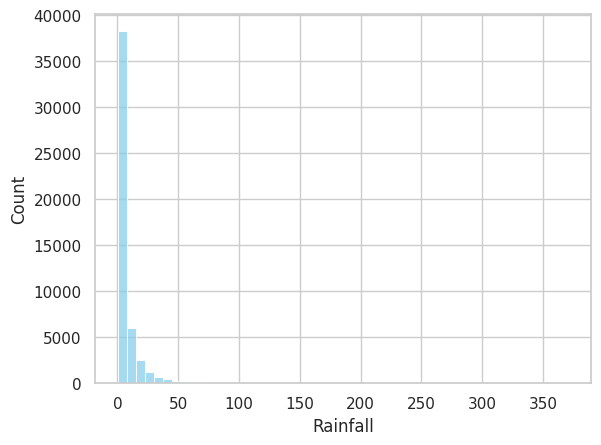

In [ ]:
sns.histplot(df[df["Rainfall"]>0]["Rainfall"], bins=50, kde=False, color='skyblue')

In [ ]:
ninety_ninth_quartile_rainfall = df_train['Rainfall'].quantile(0.95)
print(f"The 95th quartile of Rainfall values is: {ninety_ninth_quartile_rainfall}")

The 95th quartile of Rainfall values is: 13.0


In [ ]:
len(df_train[df_train["Rainfall"]>37]["Rainfall"])

1184

In [ ]:
# Cap the top 1% of Rainfall values to 37
df_train['Rainfall'] = np.where(df_train['Rainfall'] > ninety_ninth_quartile_rainfall, ninety_ninth_quartile_rainfall, df_train['Rainfall'])

In [ ]:
df_train['Rainfall'].describe()

,Rainfall
count,112804.000000
mean,1.528344
std,3.412903
min,0.000000
25%,0.000000
50%,0.000000
75%,0.800000
max,13.000000


<Axes: xlabel='Rainfall', ylabel='Count'>

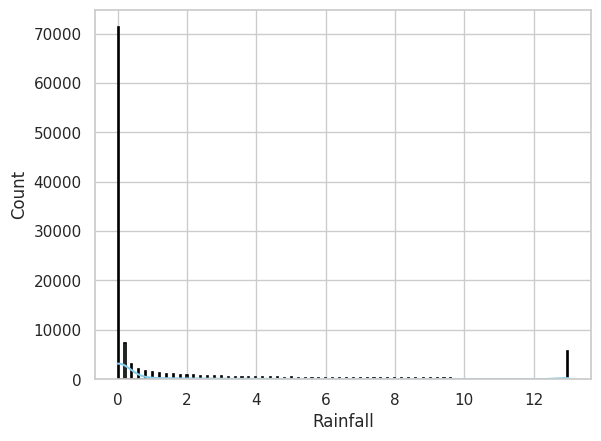

In [ ]:
sns.histplot(df_train['Rainfall'], kde=True, color='skyblue', linewidth=1.2, edgecolor='black')

## WindGustSpeed

In [ ]:
df_train[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe()

KeyError: "['WindSpeed9am', 'WindSpeed3pm'] not in index"

<Axes: xlabel='WindGustSpeed', ylabel='Count'>

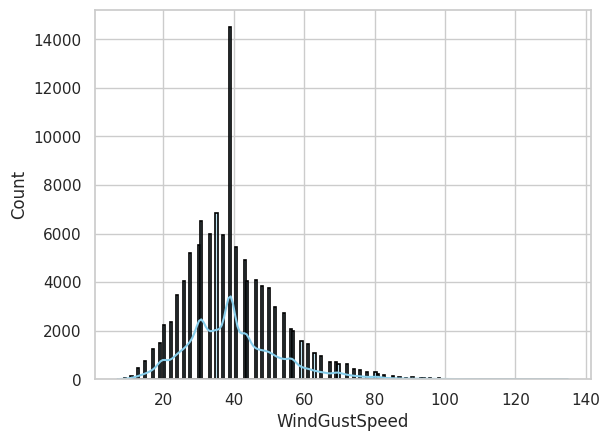

In [ ]:
sns.histplot(df_train['WindGustSpeed'], kde=True, color='skyblue', linewidth=1.2, edgecolor='black')

In [ ]:
df_train['WindGustSpeed'].mode()

,WindGustSpeed
0,39.0


In [ ]:
ninety_ninth_quartile_windgust = df_train['WindGustSpeed'].quantile(0.95)
print(f"The 99th quartile of WindGustSpeed values is: {ninety_ninth_quartile_windgust}")

The 99th quartile of WindGustSpeed values is: 65.0


In [ ]:
# cap on WindGustSpeed
df_train['WindGustSpeed'] = np.where(df_train['WindGustSpeed'] > ninety_ninth_quartile_windgust, ninety_ninth_quartile_windgust, df_train['WindGustSpeed'])

In [ ]:
df_train['WindGustSpeed'].describe()

,WindGustSpeed
count,112804.000000
mean,39.726526
std,13.036127
min,7.000000
25%,31.000000
50%,39.000000
75%,46.000000
max,80.000000


## Temp3pm, MaxTemp

<Axes: xlabel='Temp3pm', ylabel='Count'>

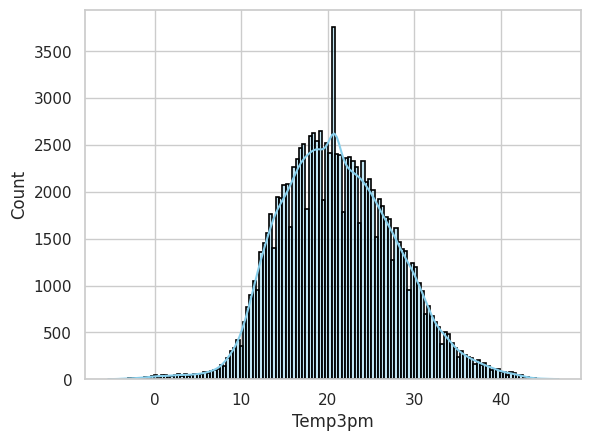

In [ ]:
sns.histplot(df_train['Temp3pm'], kde=True, color='skyblue', linewidth=1.2, edgecolor='black')

In [ ]:
df_train.shape

(112804, 24)

In [ ]:
df_test.shape

(28202, 24)

In [ ]:
df_save = df_train.copy()

# Normalization

In [ ]:
continuous_features = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm',
                       'Humidity_delta', 'Temp_delta', 'Pressure_delta', '7DayAvgHumidity', '7DayAvgTemp',
                       '7DayAvgCloud3pm', '7DayAvgRainfall', '7DayAvgSunshine', '3DayAvgHumidity', '3DayAvgCloud3pm',
                       '3DayAvgRainfall', '3DayAvgSunshine']

# StandardScaler object
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df_train[continuous_features])

# Convert the scaled features back to a DataFrame
df_train_scaled = pd.DataFrame(scaled_features, columns=continuous_features, index=df_train.index)

# update df_train with the scaled features
df_train[continuous_features] = df_train_scaled

In [ ]:
df_train.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainToday_encoded,RainTomorrow_encoded,Humidity_delta,Temp_delta,Pressure_delta,7DayAvgHumidity,7DayAvgTemp,7DayAvgCloud3pm,7DayAvgRainfall,7DayAvgSunshine,3DayAvgHumidity,3DayAvgCloud3pm,3DayAvgRainfall,3DayAvgSunshine
0,0.024093,-0.272011,1.080349,0.385688,0.037465,-1.514360,-1.536602,-1.300243,-0.842780,0.083293,0.0,0.0,-1.896430,0.058189,0.933079,0.089583,-0.012499,0.038124,-0.339098,0.026529,0.051445,0.035943,-0.364448,0.054854
1,0.344405,-0.447815,1.277609,0.385688,-1.449733,-1.366724,-1.105963,-1.194747,-1.431559,0.458754,0.0,0.0,-0.088259,0.668784,-0.249067,0.089583,-0.012499,0.038124,-0.339098,0.026529,0.051445,0.035943,-0.364448,0.054854
2,0.431763,-0.447815,0.956357,0.551239,-1.780222,-1.120665,-1.551451,-1.059109,-1.095114,0.293551,0.0,0.0,0.574738,-0.691177,1.846555,0.089583,-0.012499,0.038124,-0.339098,0.026529,-1.559832,-1.531874,-0.364448,1.398363
3,0.766636,-0.447815,0.838001,-1.269819,-1.394652,-1.809630,-0.066489,-0.441206,-0.758669,0.789159,0.0,0.0,-0.690982,1.029590,-1.323745,0.089583,-0.012499,0.038124,-0.339098,0.026529,-1.674923,-1.493634,-0.397964,1.296114
4,1.392702,-0.154808,0.291309,0.137362,0.643361,-0.973030,-1.076263,-1.466022,1.428223,1.269749,0.0,0.0,-1.896430,2.000990,-1.323745,0.089583,-0.012499,0.038124,-0.339098,0.026529,-1.521468,-0.193493,-0.342103,0.879983


In [ ]:
df_save_test = df_test.copy()

In [ ]:
df_test = df_save_test.copy()

In [ ]:
scaled_features_test = scaler.transform(df_test[continuous_features])

# Convert the scaled features back to a DataFrame
df_test_scaled = pd.DataFrame(scaled_features_test, columns=continuous_features, index=df_test.index)

# update df_train with the scaled features
df_test[continuous_features] = df_test_scaled

In [ ]:
df_test.head()

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp3pm,RainToday_encoded,RainTomorrow_encoded,Humidity_delta,Temp_delta,Pressure_delta,7DayAvgHumidity,7DayAvgTemp,7DayAvgCloud3pm,7DayAvgRainfall,7DayAvgSunshine,3DayAvgHumidity,3DayAvgCloud3pm,3DayAvgRainfall,3DayAvgSunshine
112804,0.140570,-0.447815,0.595653,1.213441,-0.513349,-0.628548,1.522420,1.548142,-1.515670,0.323588,0.0,0.0,-0.208803,0.280224,0.019602,-0.953964,0.270460,NaN,-0.540799,0.794853,-0.696648,NaN,-0.397964,0.623170
112805,0.155130,-0.447815,0.595653,0.716789,-0.568430,-0.923818,1.685766,1.442646,-1.936226,0.308569,0.0,0.0,-0.510165,0.752047,-0.947608,-0.972434,0.321247,NaN,-0.540799,0.770578,-0.830921,-1.876029,-0.397964,0.611281
112806,0.606479,-0.447815,0.623833,0.551239,-1.284489,-1.366724,1.284826,1.231655,-1.515670,0.759122,0.0,0.0,-0.269076,0.946327,-0.249067,-1.037078,0.405893,NaN,-0.540799,0.752371,-1.137831,-2.258423,-0.397964,0.765844
112807,0.635599,-0.447815,-0.728807,2.123970,-2.826769,-1.809630,0.854187,0.508256,NaN,0.669012,0.0,1.0,0.876100,0.335732,-1.270011,-1.194072,0.480864,NaN,-0.540799,0.448925,-1.598196,NaN,-0.397964,0.207039
112808,-0.936846,-0.096207,-1.602386,1.958419,-0.954000,1.192289,-0.422880,-0.682339,-0.674558,-0.998035,1.0,1.0,2.503454,-1.551560,-0.893874,-0.880084,0.299481,NaN,-0.501760,0.078722,-0.773375,NaN,-0.330931,-0.720339


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MaxTemp,28164.0,0.365368,1.119601,-2.290895,-0.543735,0.227928,1.363582,3.431056
Rainfall,28099.0,0.175106,2.285117,-0.447815,-0.447815,-0.447815,-0.330613,107.261567
Sunshine,15838.0,0.315499,0.995246,-2.053266,-0.306107,0.595653,1.046533,1.948292
WindGustSpeed,27916.0,0.086699,1.042180,-2.759775,-0.690392,-0.028189,0.551239,7.504367
Humidity9am,28075.0,-0.408344,1.155195,-3.818234,-1.119245,-0.293023,0.423035,1.634826
Humidity3pm,27317.0,-0.325910,1.038973,-2.547807,-1.120665,-0.333277,0.404900,2.324160
Pressure9am,24131.0,-0.310817,1.075921,-5.323255,-1.002015,-0.363482,0.408699,3.334074
Pressure3pm,24121.0,-0.375480,1.086833,-5.821488,-1.104322,-0.471348,0.372618,3.597773
Cloud3pm,16442.0,-0.281242,1.155948,-1.936226,-1.515670,-0.254002,1.007667,1.428223
Temp3pm,27480.0,0.338113,1.135018,-2.605007,-0.562500,0.188422,1.329823,3.522514


In [ ]:
df_test = df_test.fillna(0.0)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28202 entries, 112804 to 141005
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MaxTemp               28202 non-null  float64
 1   Rainfall              28202 non-null  float64
 2   Sunshine              28202 non-null  float64
 3   WindGustSpeed         28202 non-null  float64
 4   Humidity9am           28202 non-null  float64
 5   Humidity3pm           28202 non-null  float64
 6   Pressure9am           28202 non-null  float64
 7   Pressure3pm           28202 non-null  float64
 8   Cloud3pm              28202 non-null  float64
 9   Temp3pm               28202 non-null  float64
 10  RainToday_encoded     28202 non-null  float64
 11  RainTomorrow_encoded  28202 non-null  float64
 12  Humidity_delta        28202 non-null  float64
 13  Temp_delta            28202 non-null  float64
 14  Pressure_delta        28202 non-null  float64
 15  7DayAvgHumidi

In [ ]:
df_train.to_csv('df_train_modeling2_prepared.csv', index=False)
df_test.to_csv('df_test_modeling2_prepared.csv', index=False)
files.download('df_train_modeling2_prepared.csv')
files.download('df_test_modeling2_prepared.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/assets/df_train_modeling2_prepared.csv'
df_train = pd.read_csv(path, sep=',')

In [4]:
path2 = '/content/drive/My Drive/Colab Notebooks/EPAM DS foundations course/DS_module3/assets/df_test_modeling2_prepared.csv'
df_test = pd.read_csv(path2, sep=',')

In [5]:
def evaluation_report (y_test, y_pred, model_name):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) # sklearn.metrics
    print(f"{model_name}'s Accuracy is : {accuracy}\n\n")

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", confusion_table(y_test, y_pred))

    # Calculate metrics: FN, NP, FN, FP
    my_conf_matrix = confusion_matrix(y_test, y_pred)
    true_neg = my_conf_matrix[0, 0]
    true_pos = my_conf_matrix[1, 1]
    false_neg = my_conf_matrix[1, 0]
    false_pos = my_conf_matrix[0, 1]

    print(f"\nTrue Negatives: {true_neg}")
    print(f"True Positives: {true_pos}")
    print(f"False Negatives: {false_neg}")
    print(f"False Positives: {false_pos}")

    # Overall
    overall = true_neg + true_pos + false_neg + false_pos
    print(f"Overall: {overall}")

    # Classification report
    print("\nClassification report:")
    classification_rep = classification_report(y_test, y_pred)
    print(classification_rep)

    # Precision, recall
    print("\nRates:")
    accuracy = (true_neg + true_pos) / overall
    precision = true_pos / (true_pos + false_pos)
    false_positive_rate = false_pos / (false_pos + true_neg)
    recall = true_pos / (true_pos + false_neg)
    f1 = 2 * (precision * recall) / (precision + recall)

    #print
    print(f"Precision (TPR): {precision}")
    print(f"False Positive Rate (FPR): {false_positive_rate}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

In [6]:
def show_roc_curve(y_test, y_pred_proba, model_name):
    # ROC curve
    fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)
    #roc_auc = auc(fprs, tprs)
    plt.plot(fprs, tprs)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"\n{model_name} ROC Curve")
    plt.show()

    # Roc Auc Score
    print(f"\nRoc Auc Score: {roc_auc_score(y_test, y_pred_proba)}")

In [7]:
X_train = df_train.drop('RainTomorrow_encoded', axis=1)
y_train = df_train['RainTomorrow_encoded']

X_test = df_test.drop('RainTomorrow_encoded', axis=1)
y_test = df_test['RainTomorrow_encoded']

In [9]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3c576b6752856cb978dc2a0791daf868ac47a1e150a47db80cff3baa8cd787b2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [10]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast

In [11]:
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
roc_curve_svm = RocCurveDisplay.from_estimator
import sklearn.model_selection as skm

In [24]:
# Initialize and train the Logistic Regression classifier
logreg = LogisticRegression(max_iter=100)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

In [26]:
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [76]:
# Iterate through a range of thresholds
new_treshold = 0.5
accrcy = 0.5
for threshold in np.arange(0.05, 1.0, 0.001):
  y_pred_logreg_1 = (y_pred_proba_logreg >= threshold).astype(int)
  my_accuracy_logreg = accuracy_score(y_test, y_pred_logreg_1)
  if my_accuracy_logreg > accrcy:
    accrcy = my_accuracy_logreg
    new_treshold = threshold
  print(f"Threshold: {threshold:.3f}, Accuracy: {my_accuracy_logreg}")
print(f"Best threshold: {new_treshold}")
print(f"Best accuracy: {accrcy}")

Threshold: 0.050, Accuracy: 0.4672009077370399
Threshold: 0.051, Accuracy: 0.4727324303240905
Threshold: 0.052, Accuracy: 0.47840578682362955
Threshold: 0.053, Accuracy: 0.48404368484504645
Threshold: 0.054, Accuracy: 0.48950429047585275
Threshold: 0.055, Accuracy: 0.49425572654421673
Threshold: 0.056, Accuracy: 0.5001418339124885
Threshold: 0.057, Accuracy: 0.5051060208495851
Threshold: 0.058, Accuracy: 0.5102120416991702
Threshold: 0.059, Accuracy: 0.5158144812424651
Threshold: 0.060, Accuracy: 0.5208850436139281
Threshold: 0.061, Accuracy: 0.5247854762073612
Threshold: 0.062, Accuracy: 0.5288277427132827
Threshold: 0.063, Accuracy: 0.53396922204099
Threshold: 0.064, Accuracy: 0.5383306148500107
Threshold: 0.065, Accuracy: 0.5431175093964967
Threshold: 0.066, Accuracy: 0.54769165307425
Threshold: 0.067, Accuracy: 0.5514857102333168
Threshold: 0.068, Accuracy: 0.5545705978299411
Threshold: 0.069, Accuracy: 0.5587546982483512
Threshold: 0.070, Accuracy: 0.5627969647542728
Threshold: 0.

In [81]:
new_treshold = 0.237

In [82]:
y_pred_logreg_adjusted = (y_pred_proba_logreg >= new_treshold).astype(int)

In [83]:
accuracy_logreg_1 = accuracy_score(y_test, y_pred_logreg_adjusted)
print(f"Logistic Regression Accuracy: {accuracy_logreg_1}")

Logistic Regression Accuracy: 0.8305084745762712


In [84]:
evaluation_report(y_test, y_pred_logreg_adjusted, 'Logistic Regression')

Logistic Regression's Accuracy is : 0.8305084745762712


Confusion matrix:
 Truth          0     1
Predicted             
0          19133  3360
1           1420  4289

True Negatives: 19133
True Positives: 4289
False Negatives: 1420
False Positives: 3360
Overall: 28202

Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     22493
         1.0       0.56      0.75      0.64      5709

    accuracy                           0.83     28202
   macro avg       0.75      0.80      0.77     28202
weighted avg       0.86      0.83      0.84     28202


Rates:
Precision (TPR): 0.5607268924042359
False Positive Rate (FPR): 0.14937980705108256
Recall: 0.7512699246803293
F1 Score: 0.642162000299446


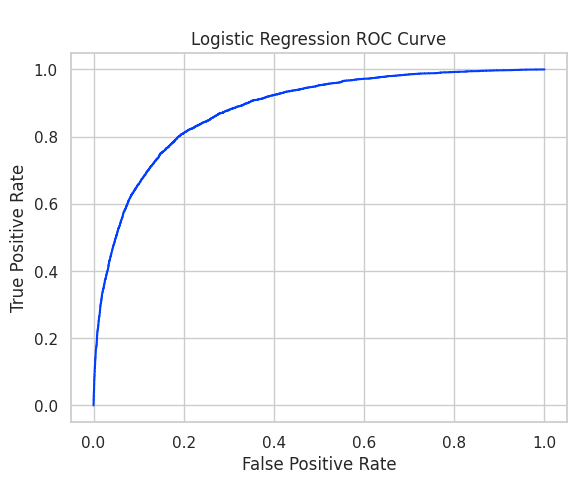


Roc Auc Score: 0.8825087615861059


In [47]:
show_roc_curve(y_test, y_pred_proba_logreg, 'Logistic Regression')

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)

# Find the optimal threshold where TPR is closest to 0.8
optimal_idx = np.argmin(np.abs(tpr - 0.8))
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold for TPR = 0.8: {optimal_threshold}")

Optimal threshold for TPR = 0.8: 0.19896229233566276
